# Download Historical Data

In [16]:
"""
    Download Historical Data from Yahoo Finance
"""

import os
import sys
import time
import datetime

import pandas as pd
import yfinance as yf

def download_data(ticker, start_date, end_date, interval):
    """
        Download Historical Data from Yahoo Finance
    """
    data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return data

# Monte Carlo Simulation

[*********************100%%**********************]  1 of 1 completed


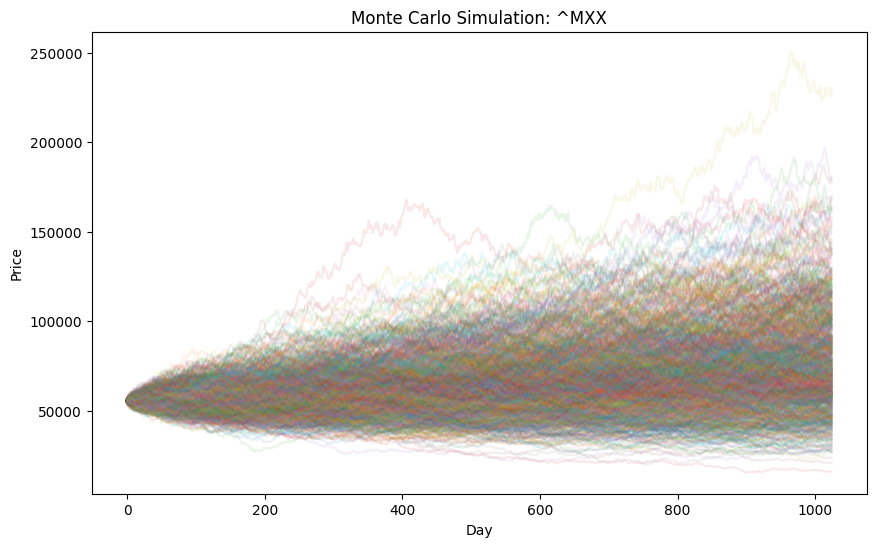

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_simulation(ticker, start, end, num_simulations):
    """
        Monte Carlo Simulation
    """
    # download historical data
    prices = download_data(ticker, start, end, '1d')
    
    # calculate daily returns
    daily_returns = prices['Adj Close'].pct_change().dropna()

    # calculate mean & standard deviation of daily returns
    mean_return = daily_returns.mean()
    std_dev = daily_returns.std()

    # generate random numbers based on normal distribution
    simulations = np.random.normal(loc= mean_return, 
                                   scale= std_dev,
                                   size=(num_simulations, len(prices)))

    # calculate the simulated prices
    last_price = prices['Adj Close'].iloc[-1]
    simulated_prices = last_price * (1 + simulations).cumprod(axis=1)
    
    # plot the simulation
    plt.figure(figsize=(10,6))
    plt.title('Monte Carlo Simulation: ' + ticker)
    plt.plot(simulated_prices.T, alpha=0.1)
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.show()

# define stock ticker & date range
ticker = '^MXX'
start_date = '2020-01-01'
end_date = '2024-01-25'

# number of simulations
num_simulations = 1000

# perform monte carlo simulation
monte_carlo_simulation(ticker, start_date, end_date, num_simulations)